 days : 1
2019-02-25 09:19:12.869884
2019-02-24 09:19:12.869884

#############################################################
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190225
                 title  rating
0                 가버나움    9.60
1                 그린 북    9.64
2  극장판 헬로카봇:옴파로스 섬의 비밀    8.79
3                 극한직업    8.68
4               기묘한 가족    5.67
5               내안의 그놈    8.30
6      님아, 그 강을 건너지 마오    9.23
7                더 랍스터    7.88
8           드래곤 길들이기 3    9.26
9         드래곤볼 슈퍼: 브로리    9.23
(39, 2)
<class 'pandas.core.frame.DataFrame'>

#############################################################
title
가버나움                   9.60
그린 북                   9.64
극장판 헬로카봇:옴파로스 섬의 비밀    8.79
극한직업                   8.68
기묘한 가족                 5.67
내안의 그놈                 8.30
님아, 그 강을 건너지 마오        9.23
더 랍스터                  7.88
드래곤 길들이기 3             9.26
드래곤볼 슈퍼: 브로리           9.23
Name: rating, dtype: float64
(39,)
<class 'pandas.core.frame.Data

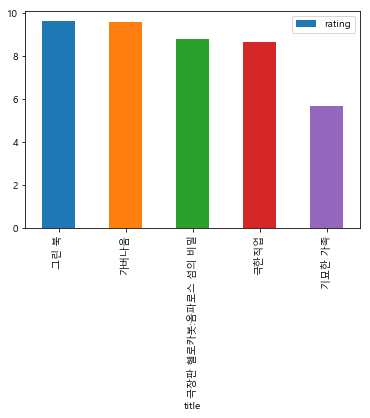

In [3]:
from bs4 import BeautifulSoup
import pandas as pd

import urllib.request
import urllib.parse

import datetime 
import numpy as np

#기간설정
day = int(input(" days : "))
today = datetime.datetime.now() #2019-02-22 15:09:27.528510
d_start = today - datetime.timedelta(days=day)
print(today)
print(d_start)
print("\n#############################################################")

#data parsing
data = []
for i in range(0,day):
    #print("i : ", i)
    d_tmp = today - datetime.timedelta(days=i)
    url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=' +  d_tmp.strftime("%Y%m%d")
    print(url)
    
    with urllib.request.urlopen(url) as response:
        html = response.read()
        soup = BeautifulSoup(html, 'html.parser')
        
    titles = soup.find_all("div",{"class": "tit5"})
    ratings = soup.find_all("td",{"class": "point"})
    
    for i in range(len(titles)):
        data.append([titles[i].a.string, float(ratings[i].string) ])
        
#print(data)
df = pd.DataFrame(data, columns=['title', 'rating'])
#print(df.groupby(['title']).mean())


res = df.groupby(['title'])['rating'].mean().reset_index(name='rating')
res1 = df.groupby(['title'])['rating'].mean()

#reset_index 비교
print("\n#############################reset_index################################")
print(res.head(10))
print(res.shape)
print(type(res))

print("\n#############################non_reset_index################################")
print(res1.head(10))
print(res1.shape)
print(type(res))

#sort
res_sorted = res.head(5).sort_values(by='rating', ascending = False)

#chart
import matplotlib.pyplot as plt
x = list(res_sorted['title'].head(5))
y = list(res_sorted['rating'].head(5))

#한글
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family = font_name)

res_sorted.plot.bar(x='title', y='rating')
#res_sorted.plot.bar()
#plt.show()

